# 1- **Import Libraries**

In [1]:
pip install -U scikit-learn==1.5.1 imbalanced-learn==0.12.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 72.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

In [4]:
df.shape

(4269, 13)

# 2- **Data Exploration**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(columns=["loan_id"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# 3- **Fix Column names and Categorical Values**

In [12]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
df.columns = [col.lstrip() for col in df.columns]
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [14]:
df["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [15]:
df["self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [16]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
df["education"] = df["education"].str.strip()
df["self_employed"] = df["self_employed"].str.strip()
df["loan_status"] = df["loan_status"].str.strip()

In [18]:
print(df["education"].unique())
print(df["self_employed"].unique())
print(df["loan_status"].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


# 4- **Data Visualization**

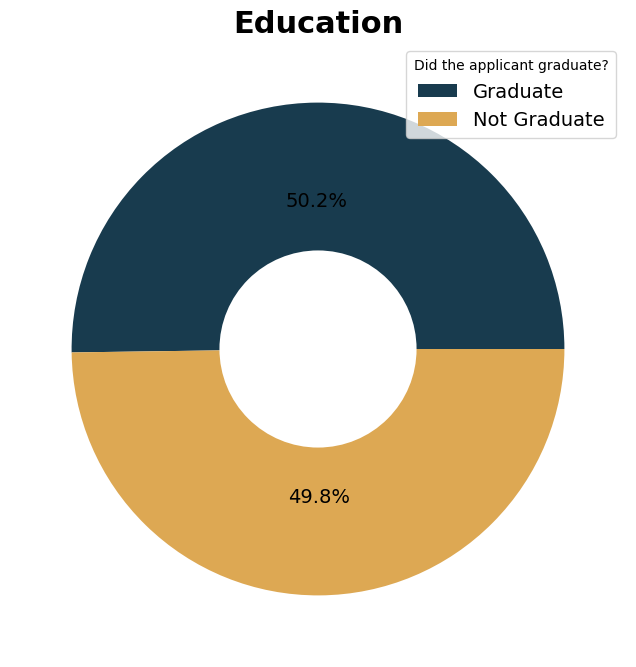

In [19]:
plt.figure(figsize=(12,8))

colors = ["#183B4E", "#DDA853"]
val_count = df['education'].value_counts()
indx = val_count.index
wedges, texts, autotexts = plt.pie(val_count, labels=None, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Education", fontsize=22, fontweight='bold')
plt.legend(wedges, indx, title="Did the applicant graduate?", loc="upper right", fontsize=14)

plt.show()

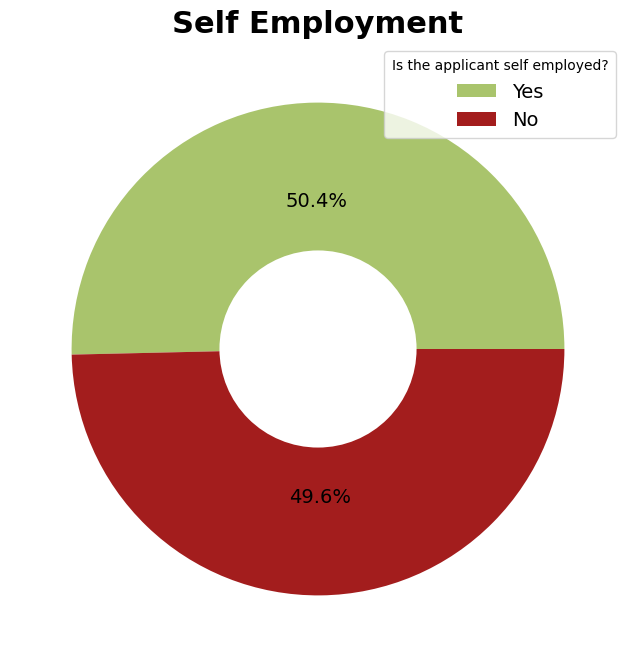

In [20]:
plt.figure(figsize=(12,8))

colors = ["#A9C46C", "#A31D1D"]
val_count = df['self_employed'].value_counts()
indx = val_count.index
wedges, texts, autotexts = plt.pie(val_count, labels=None, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Self Employment", fontsize=22, fontweight='bold')
plt.legend(wedges, indx, title="Is the applicant self employed?", loc="upper right", fontsize=14)

plt.show()

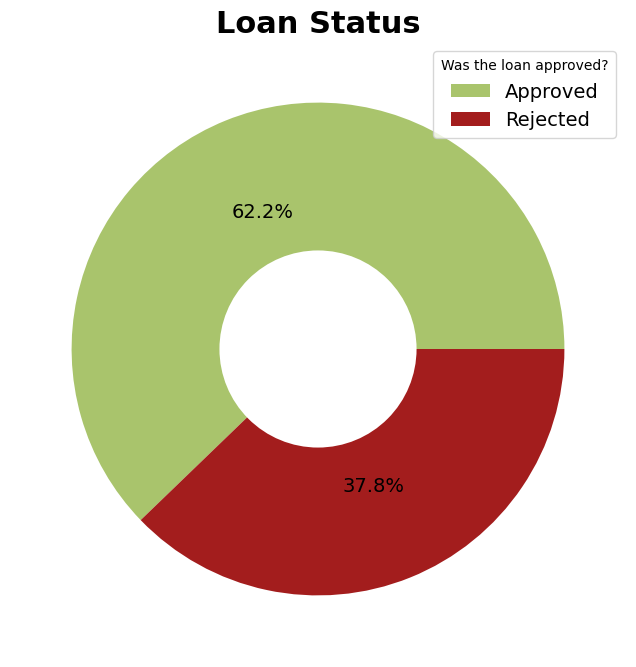

In [21]:
plt.figure(figsize=(12,8))

colors = ["#A9C46C", "#A31D1D"]
val_count = df['loan_status'].value_counts()
indx = val_count.index
wedges, texts, autotexts = plt.pie(val_count, labels=None, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Loan Status", fontsize=22, fontweight='bold')
plt.legend(wedges, indx, title="Was the loan approved?", loc="upper right", fontsize=14)
plt.show()

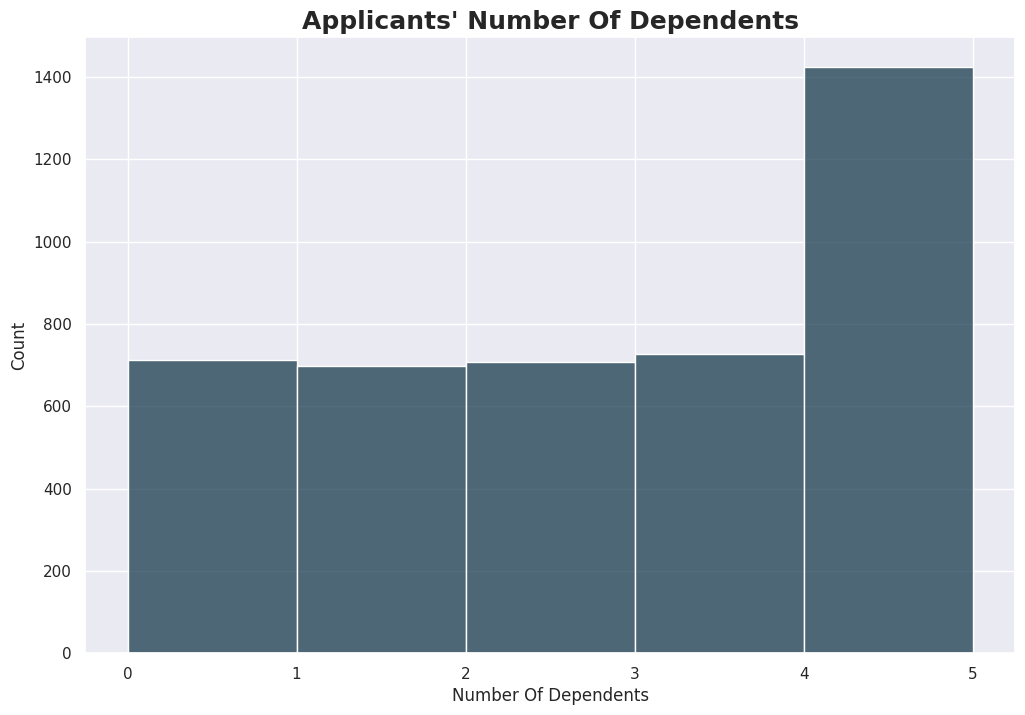

In [22]:
sns.set_theme(style='darkgrid')
n_bins = (len(df["no_of_dependents"].unique())) - 1
plt.figure(figsize=(12, 8))
color = "#183B4E"
sns.histplot(df, x="no_of_dependents", color = color, bins=n_bins)
plt.title("Applicants' Number Of Dependents", fontsize=18, fontweight='bold')
plt.xlabel("Number Of Dependents")
plt.show()

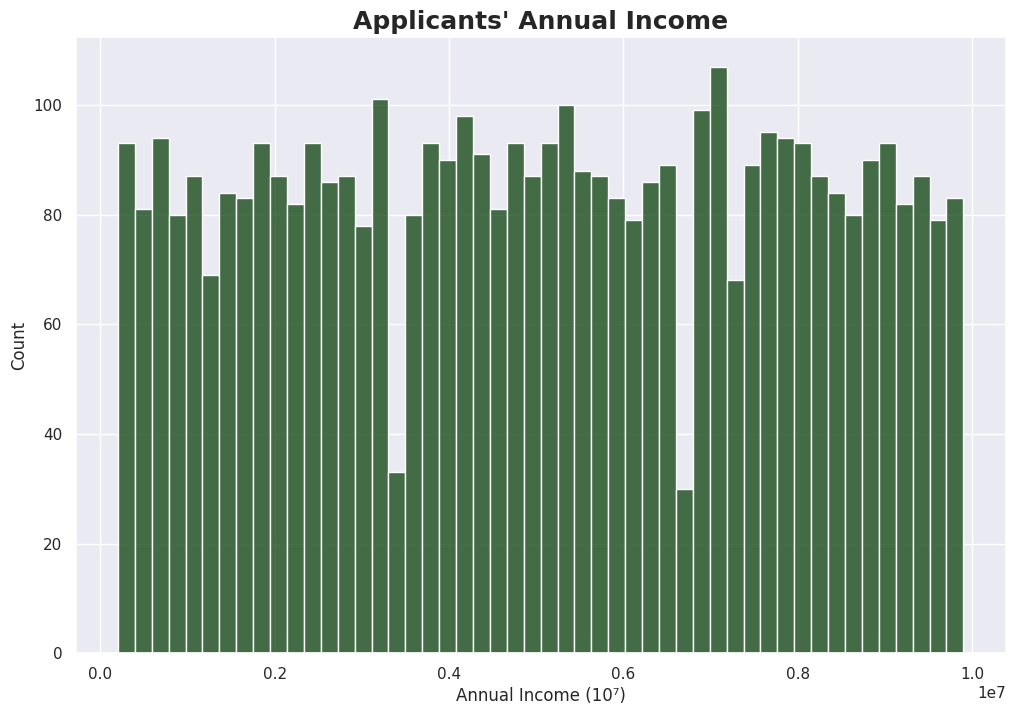

In [23]:
plt.figure(figsize=(12, 8))
color = "#0A400C"
sns.histplot(df, x="income_annum", color = color, bins=50)
plt.title("Applicants' Annual Income", fontsize=18, fontweight='bold')
plt.xlabel("Annual Income (10⁷)")
plt.show()

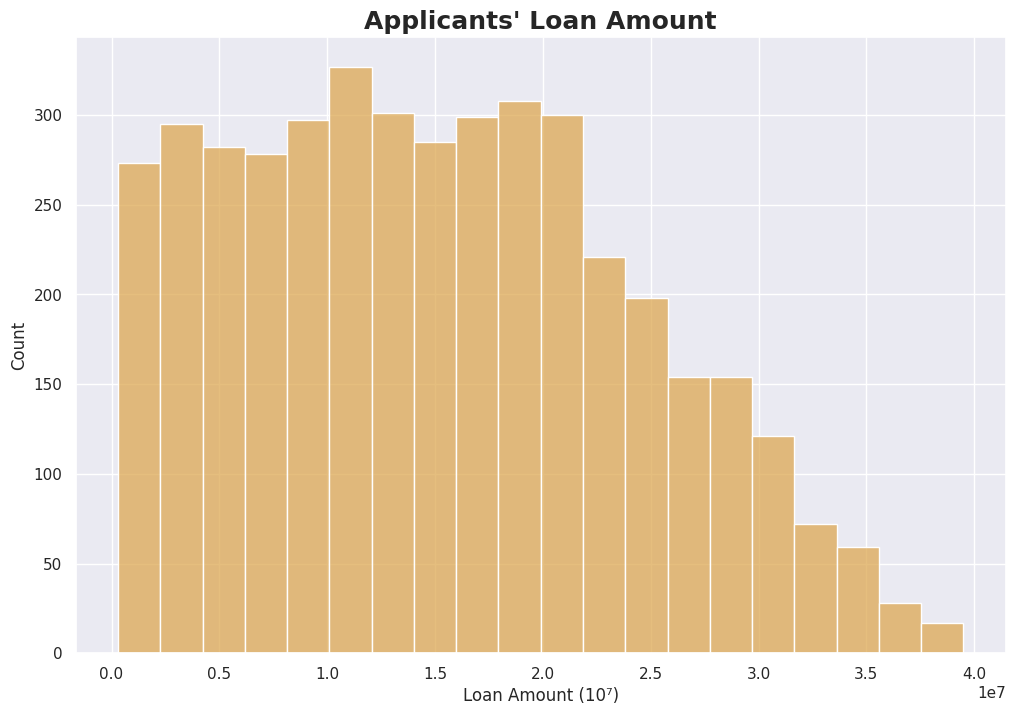

In [24]:
 plt.figure(figsize=(12, 8))
color = "#DDA853"
sns.histplot(df, x="loan_amount", color = color, bins=20)
plt.title("Applicants' Loan Amount", fontsize=18, fontweight='bold')
plt.xlabel("Loan Amount (10⁷)")
plt.show()

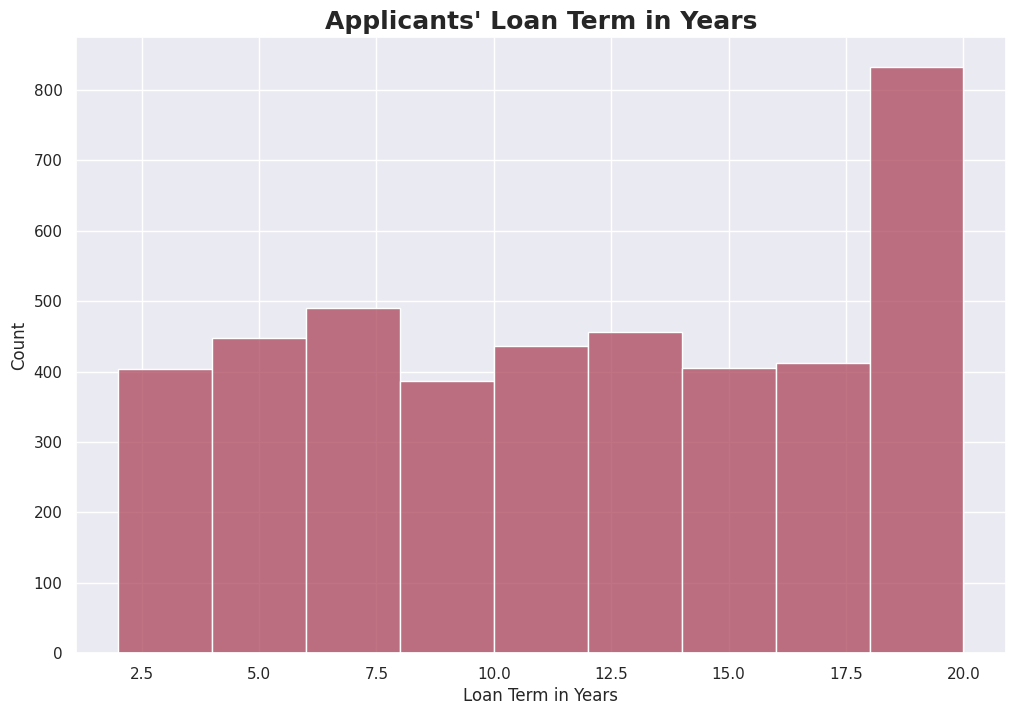

In [25]:
plt.figure(figsize=(12, 8))
n_bins = (len(df["loan_term"].unique())) - 1
color = "#AB4459"
sns.histplot(df, x="loan_term", color = color, bins=n_bins)
plt.title("Applicants' Loan Term in Years", fontsize=18, fontweight='bold')
plt.xlabel("Loan Term in Years")
plt.show()

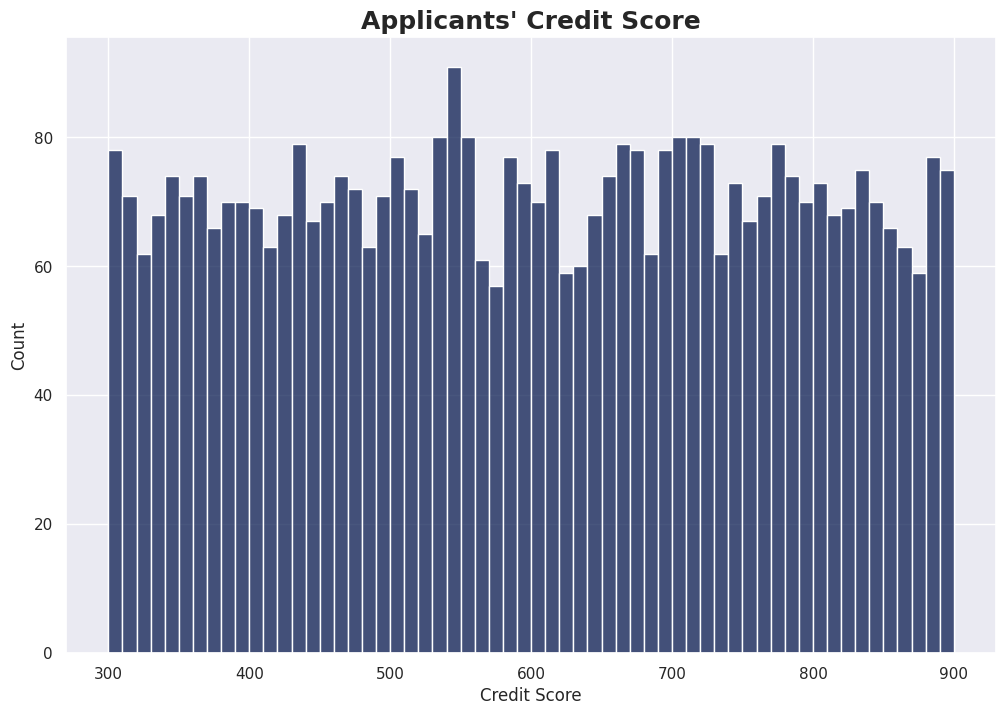

In [26]:
plt.figure(figsize=(12, 8))
color = "#0B1D51"
sns.histplot(df, x="cibil_score", color = color, bins=60)
plt.title("Applicants' Credit Score", fontsize=18, fontweight='bold')
plt.xlabel("Credit Score")
plt.show()

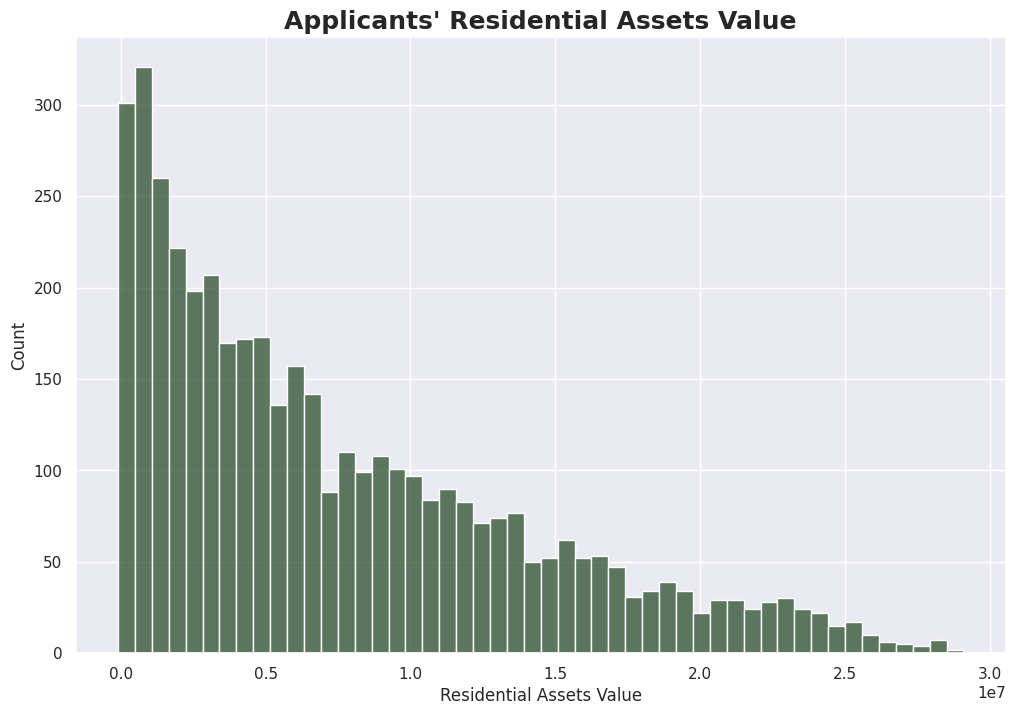

In [27]:
plt.figure(figsize=(12, 8))
color = "#2D4F2B"
sns.histplot(df, x="residential_assets_value", color = color, bins=50)
plt.title("Applicants' Residential Assets Value", fontsize=18, fontweight='bold')
plt.xlabel("Residential Assets Value")
plt.show()

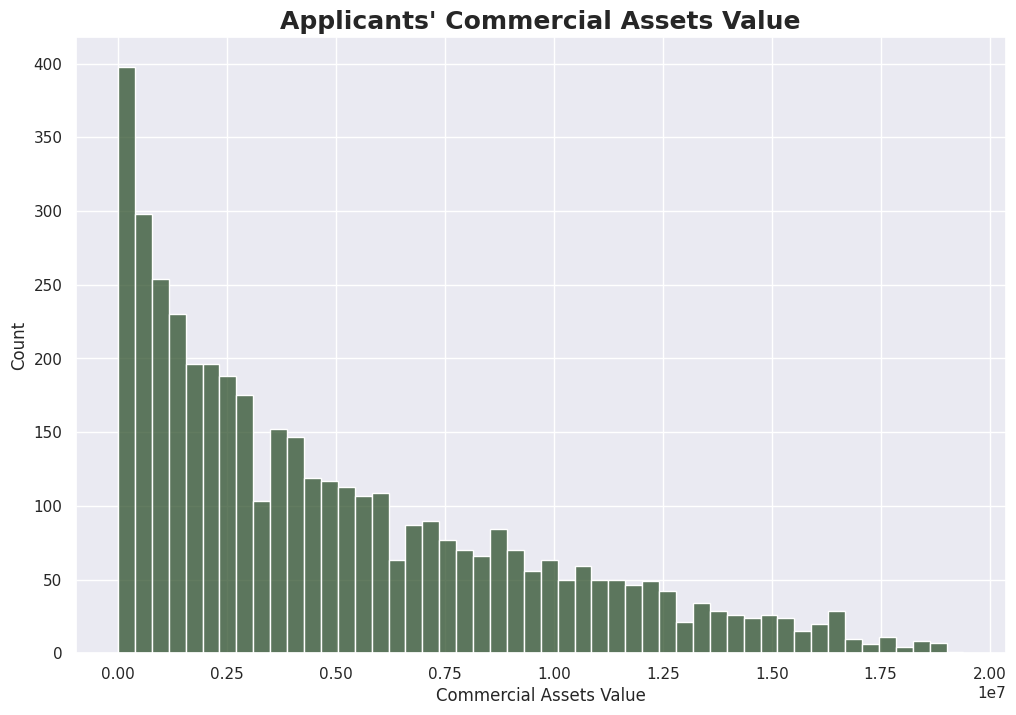

In [28]:
plt.figure(figsize=(12, 8))
color = "#2D4F2B"
sns.histplot(df, x="commercial_assets_value", color = color, bins=50)
plt.title("Applicants' Commercial Assets Value", fontsize=18, fontweight='bold')
plt.xlabel("Commercial Assets Value")
plt.show()

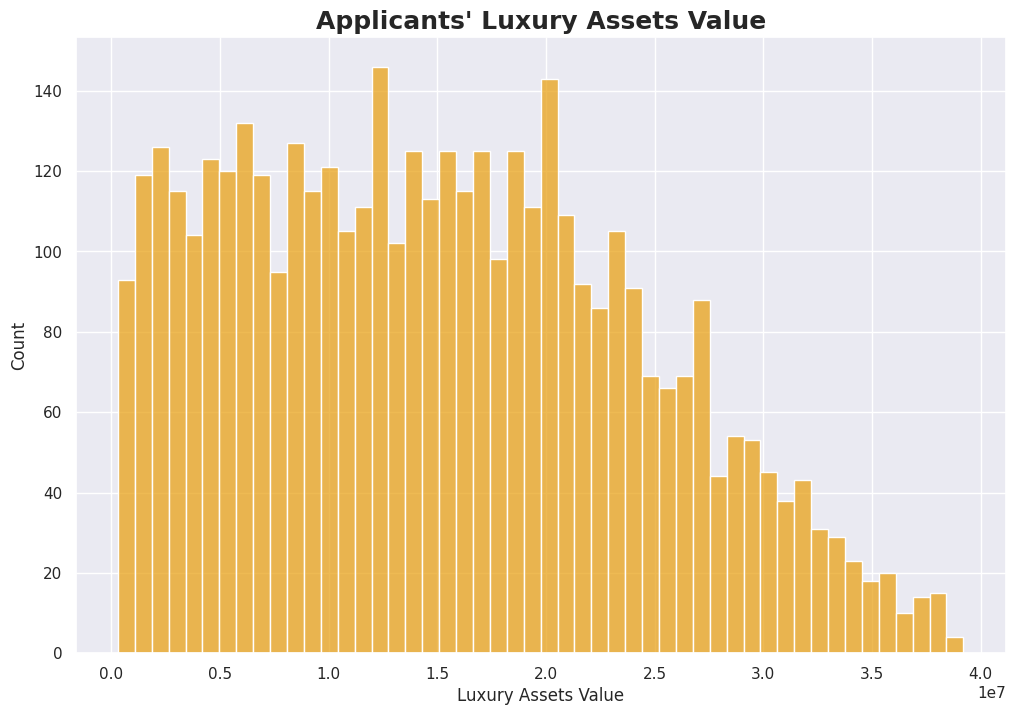

In [29]:
plt.figure(figsize=(12, 8))
color = "#E9A319"
sns.histplot(df, x="luxury_assets_value", color = color, bins=50)
plt.title("Applicants' Luxury Assets Value", fontsize=18, fontweight='bold')
plt.xlabel("Luxury Assets Value")
plt.show()

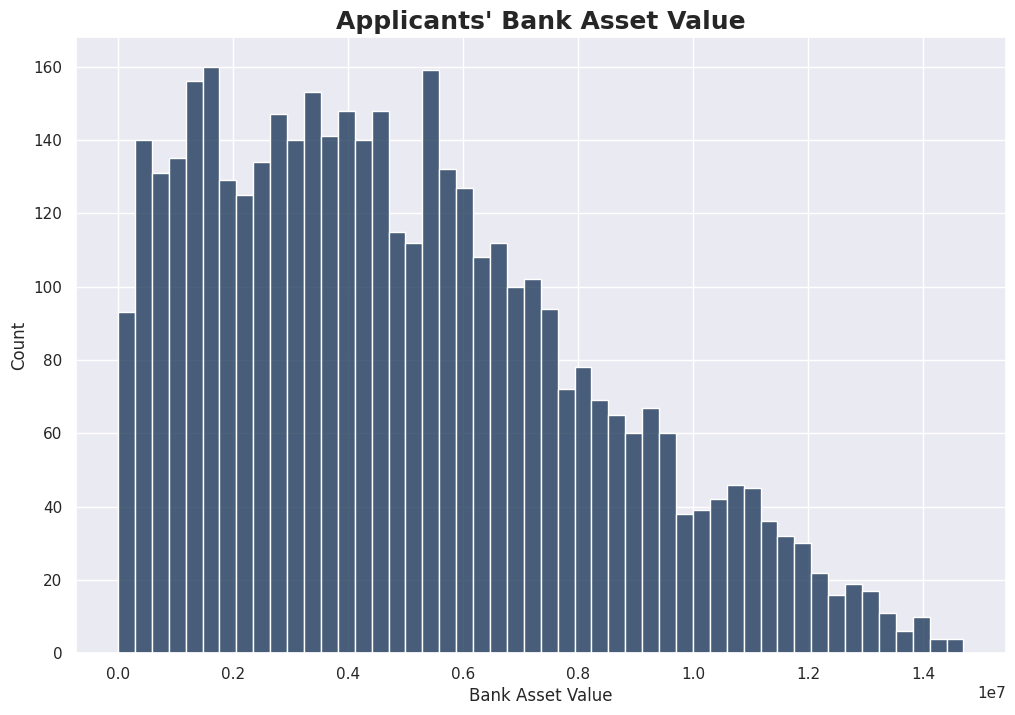

In [30]:
plt.figure(figsize=(12, 8))
color = "#102E50"
sns.histplot(df, x="bank_asset_value", color = color, bins=50)
plt.title("Applicants' Bank Asset Value", fontsize=18, fontweight='bold')
plt.xlabel("Bank Asset Value")
plt.show()

# 5- **Patterns between features**

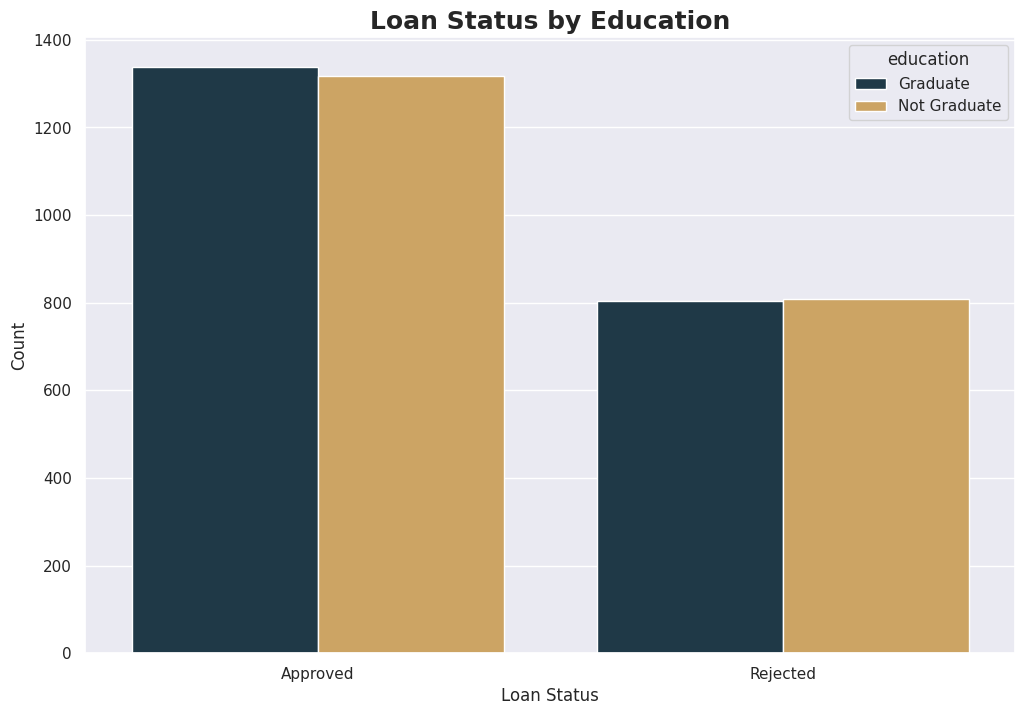

In [31]:
palette = {"Graduate": "#183B4E", "Not Graduate": "#DDA853"}

plt.figure(figsize=(12,8))
sns.countplot(data=df, x="loan_status", hue="education", palette=palette)

plt.title("Loan Status by Education", fontsize=18, fontweight="bold")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


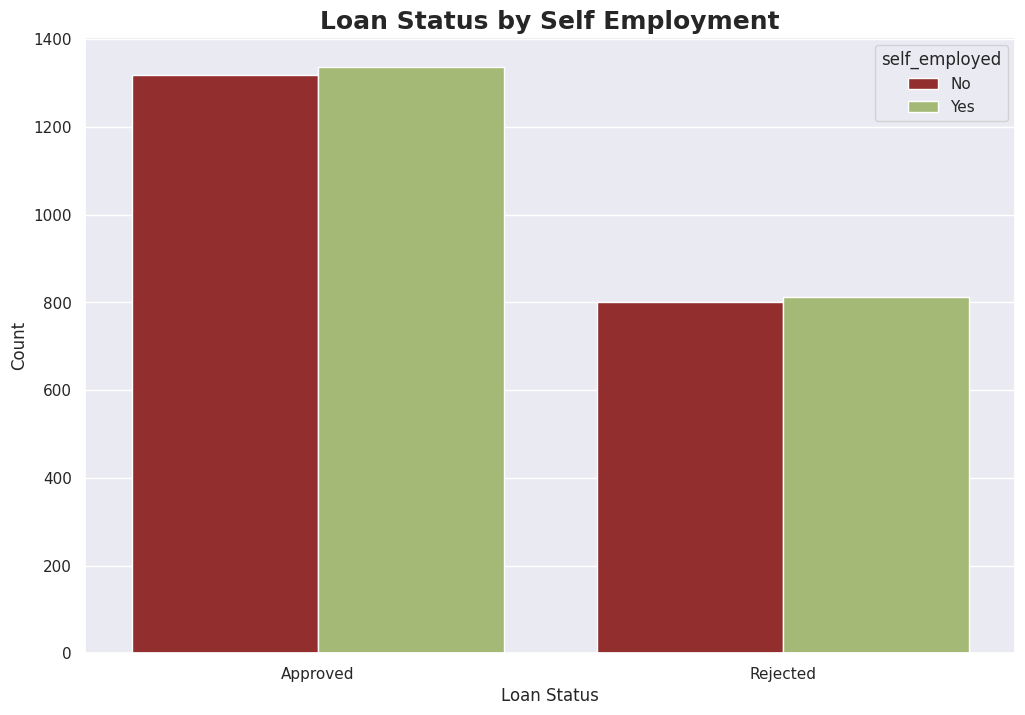

In [32]:
palette = {"Yes": "#A9C46C", "No": "#A31D1D"}

plt.figure(figsize=(12,8))
sns.countplot(data=df, x="loan_status", hue="self_employed", palette=palette)

plt.title("Loan Status by Self Employment", fontsize=18, fontweight="bold")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

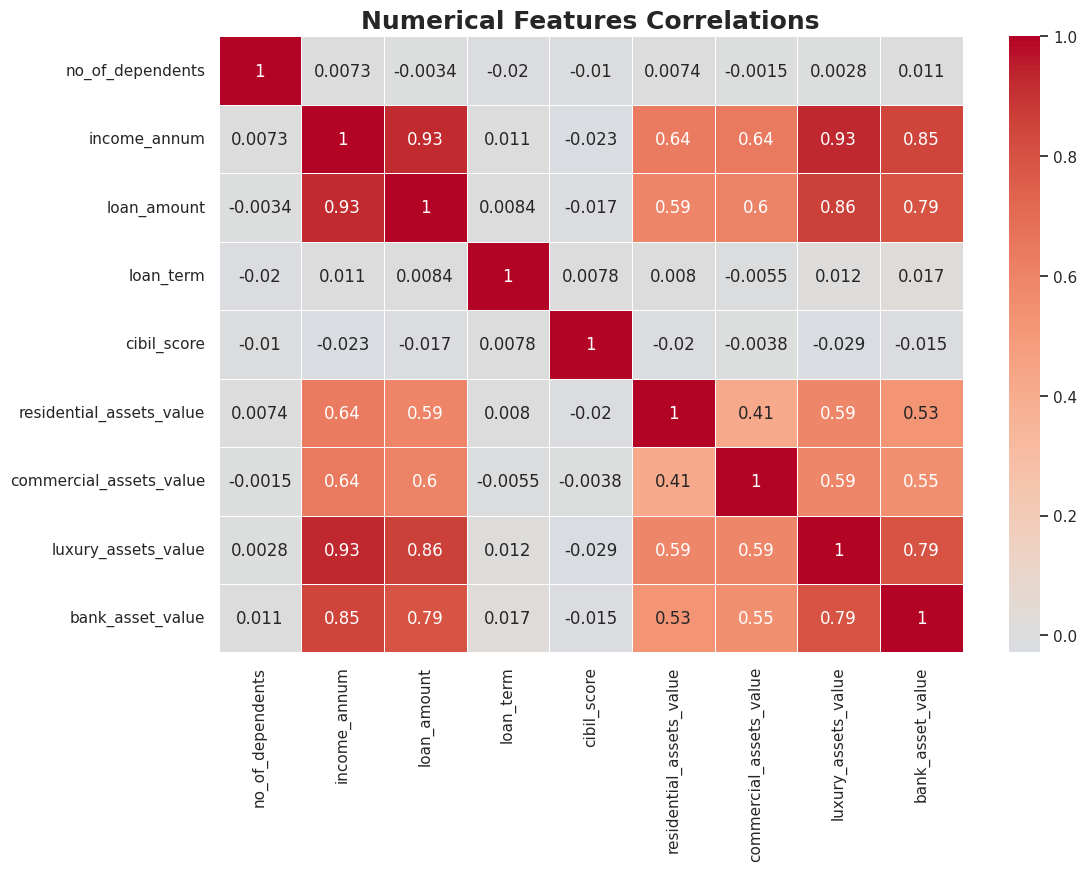

In [33]:
plt.figure(figsize=(12,8))
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidth=0.5)
plt.title("Numerical Features Correlations", fontsize=18, fontweight="bold")
plt.show()

#### The following features are highly correlated (> 0.8) so we can conosder dropping the ones less relevant to the target before training to multicollinearity and improve model stability
- inomce_annum & bank_asset_value
- income_annum & luxury_assets_value
- income_annum & loan_amount
- loan_amount & luxury_assets_value


# 6- **Check Skewness Value**

In [34]:
df[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].skew()

no_of_dependents           -0.017971
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
dtype: float64

- for `residential_assets_value`, `commercial_assets_value` and `bank_asset_value`, the |skewness| is between **0.5** and **1**, so we can leave them as they are without log/squareroot transforming them

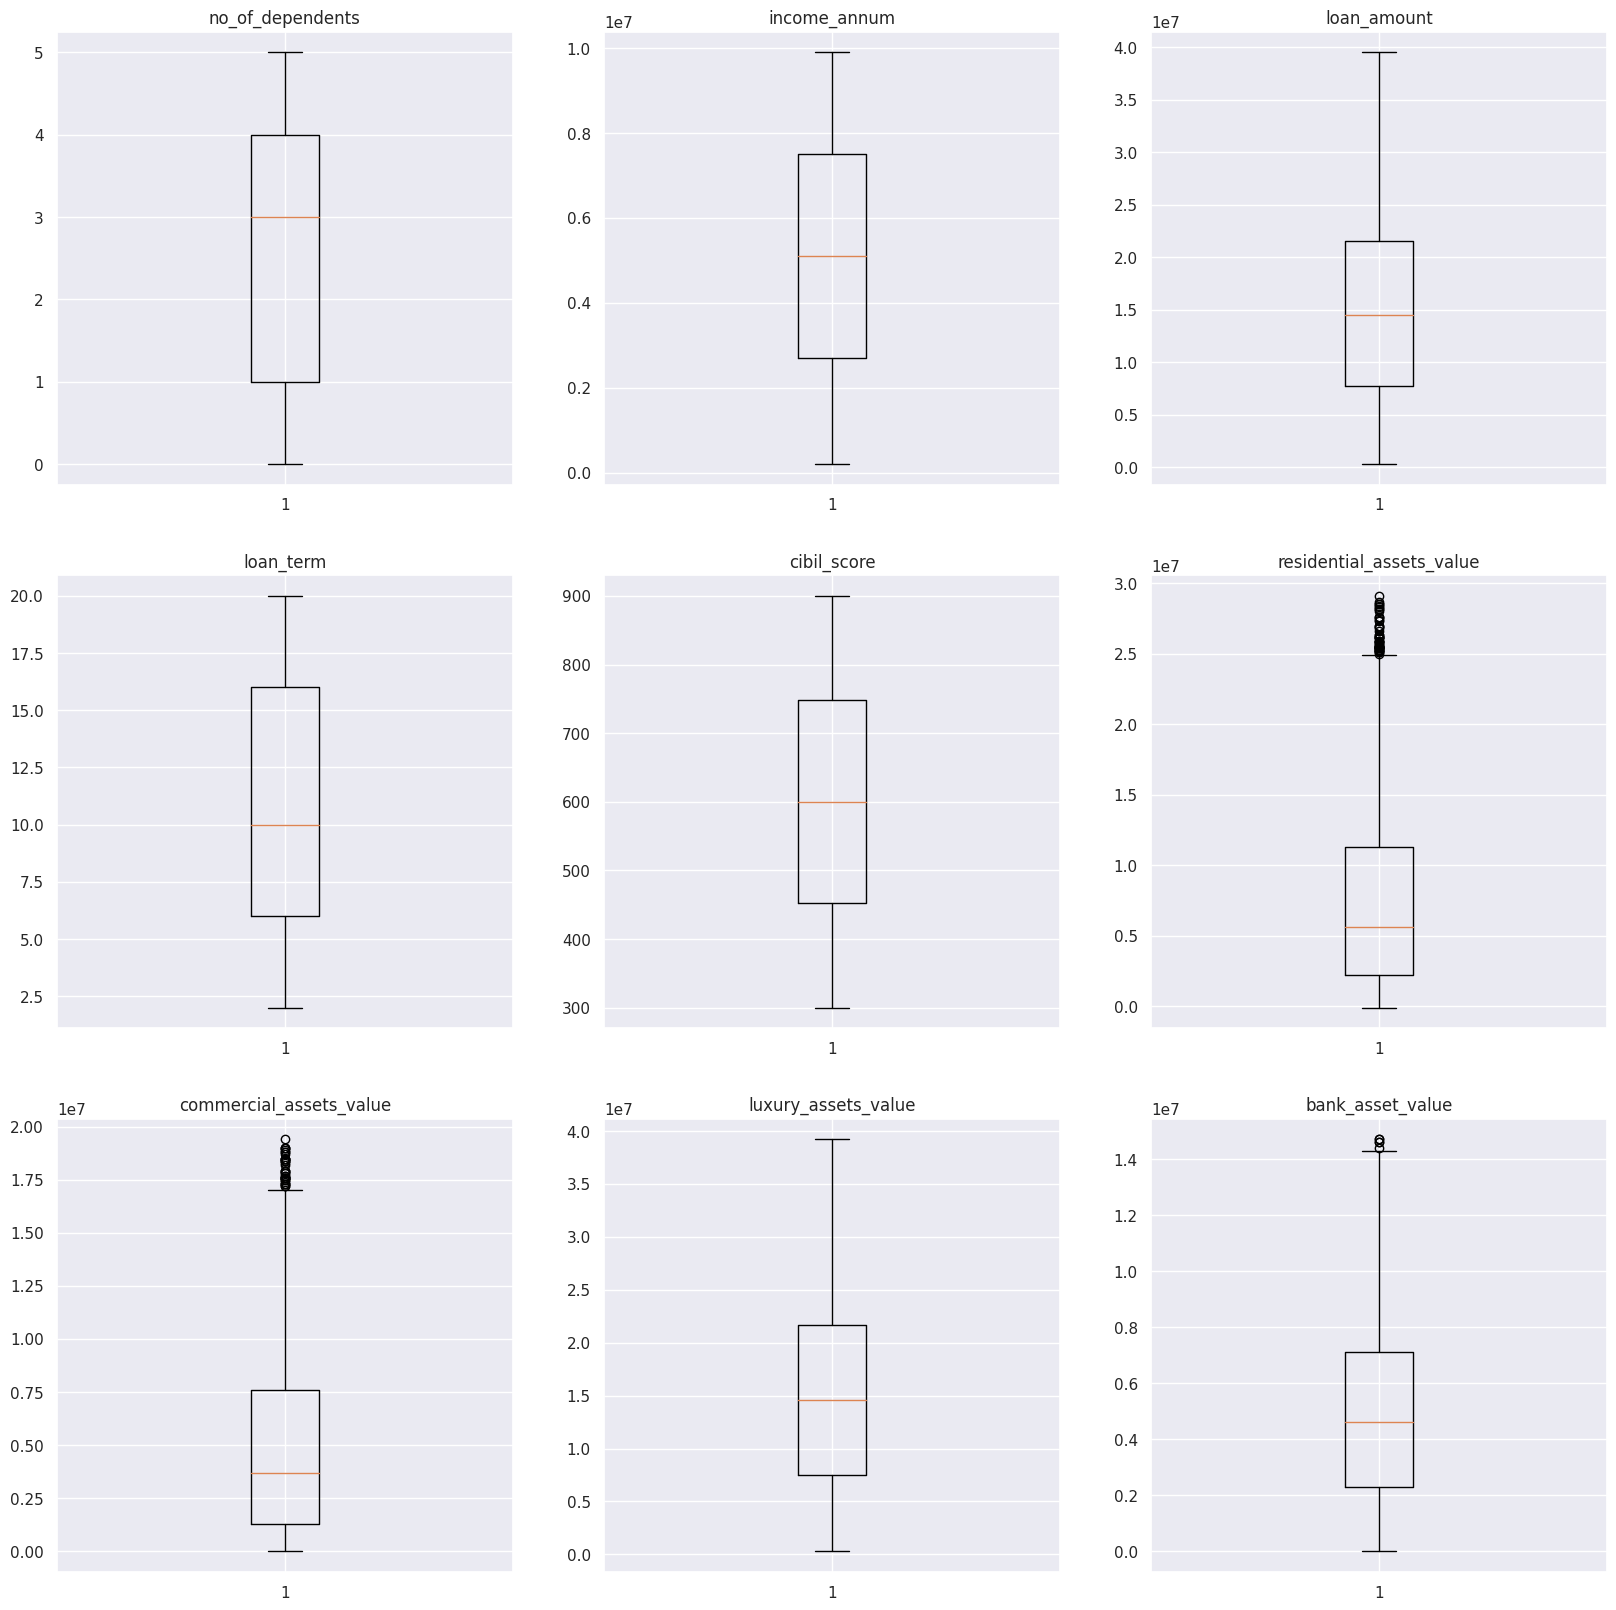

In [35]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
    
plt.show()

# 7- **Check Outliers**

In [36]:
for col in numerical_features:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

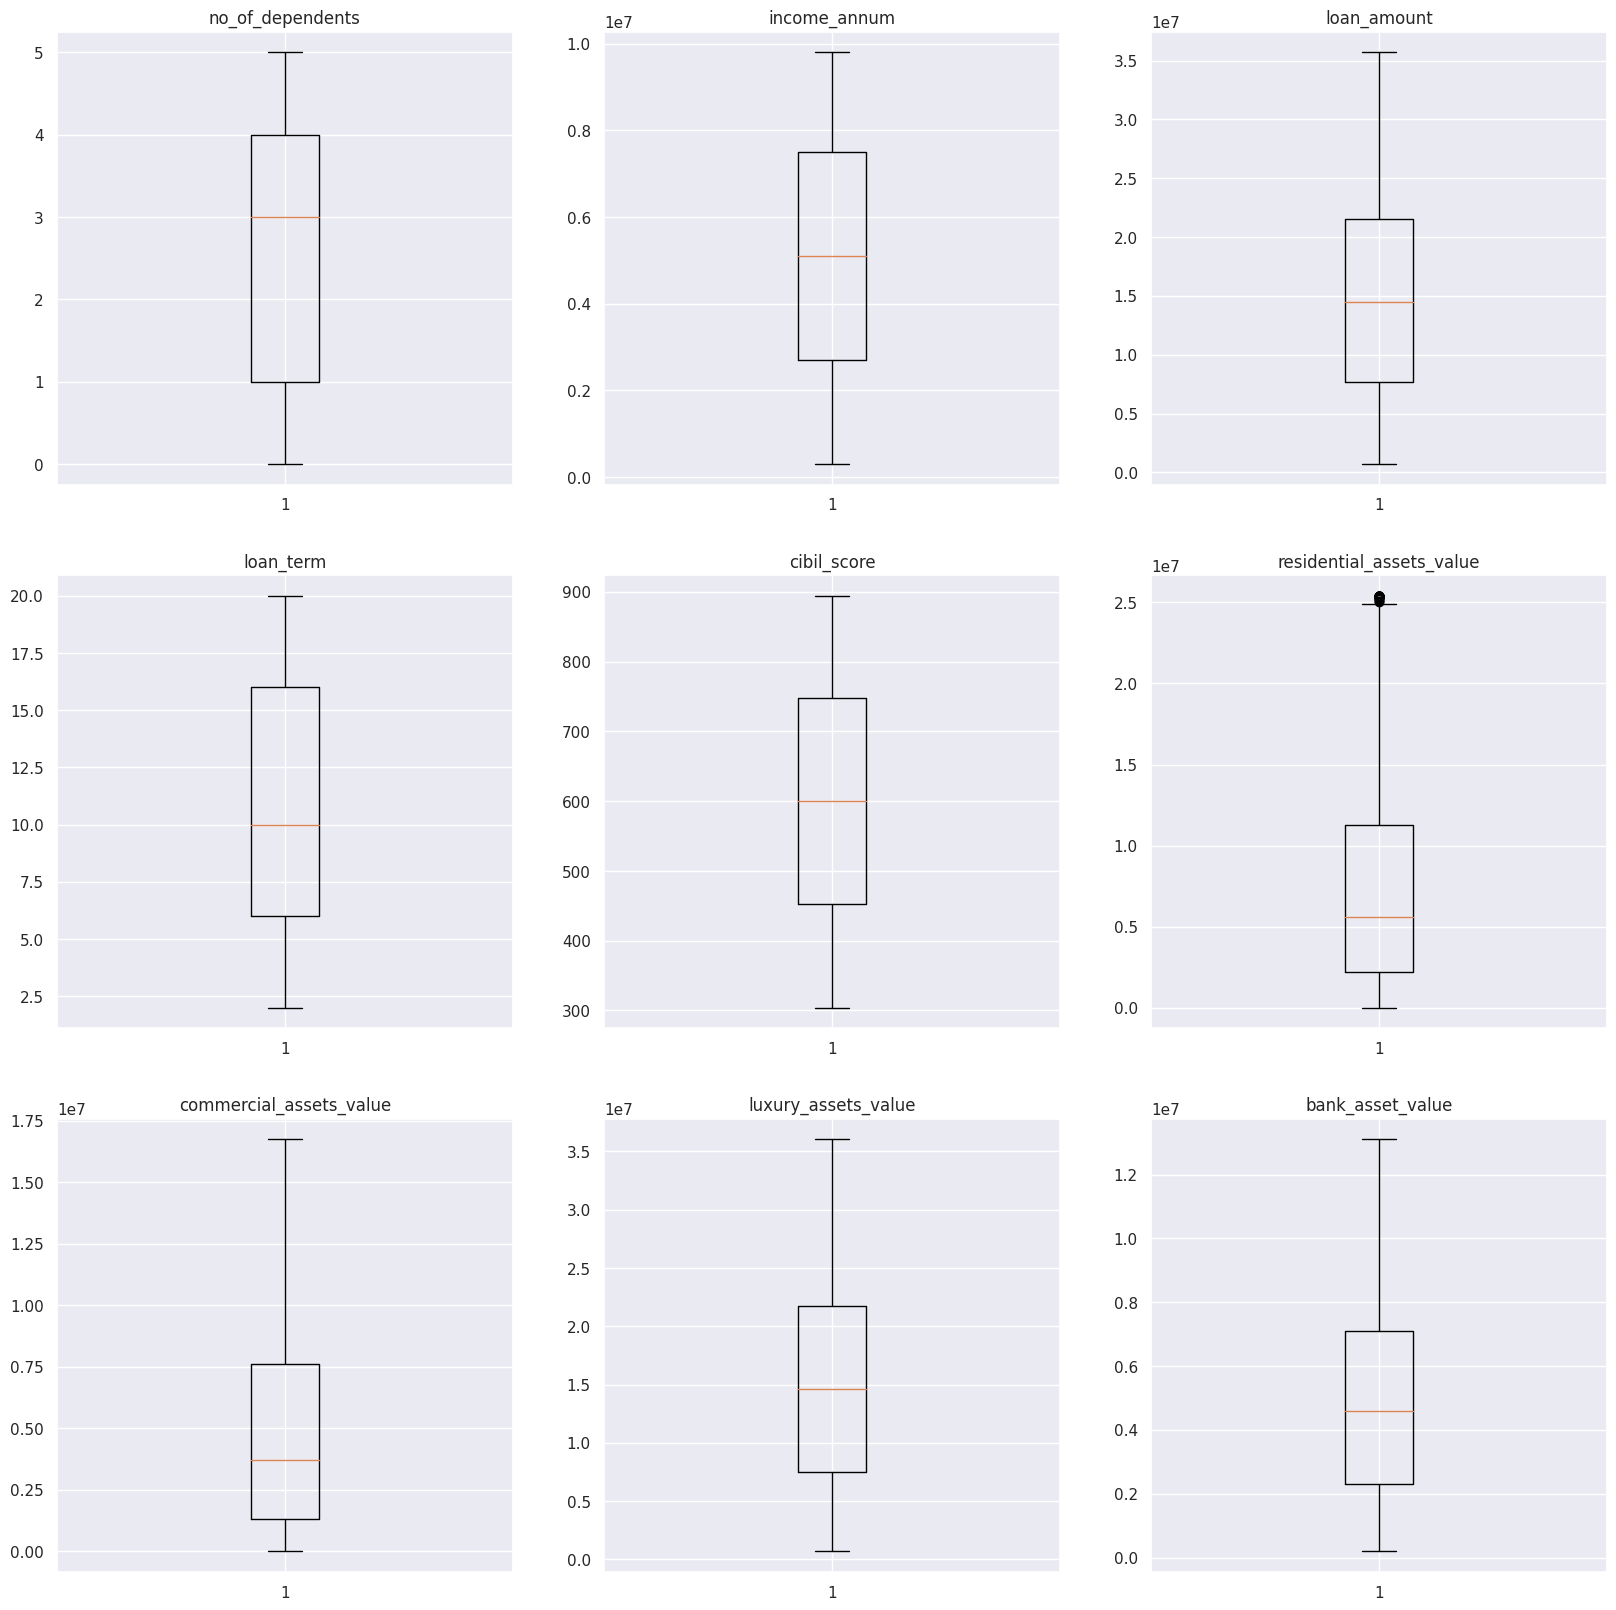

In [37]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
    
plt.show()

# 8- **Data Preprocessing**

## 8.1 **Encoding Categorical Values**

In [38]:
df["education"] = df["education"].replace({"Not Graduate":0, "Graduate":1})
df["self_employed"] = df["self_employed"].replace({"No":0, "Yes":1})
df["loan_status"] = df["loan_status"].replace({"Rejected":0, "Approved":1})

In [39]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778.0,2400000,16732000.0,22700000.0,8000000,1
1,0,0,1,4100000,12200000,8,417.0,2700000,2200000.0,8800000.0,3300000,0
2,3,1,0,9100000,29700000,20,506.0,7100000,4500000.0,33300000.0,12800000,0
3,3,1,0,8200000,30700000,8,467.0,18200000,3300000.0,23300000.0,7900000,0
4,5,0,1,9800000,24200000,20,382.0,12400000,8200000.0,29400000.0,5000000,0


## 8.2 **Drop Highly Correlated Features**

#### From the previously plotted Correlation Matrix, we can see that some features are highly correlated, so we will drop one of the two highly correlated features

In [40]:
df = df.drop(columns=["luxury_assets_value", "bank_asset_value", "income_annum"])

# **LOGISTIC REGRESSION MODEL**

# 9- **Data Splitting**

In [41]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10- **Model Training - Logistic Regression - Imbalanced Data**

- Build a training pipeline for ***scaling*** the features and ***training*** the model

In [42]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

## 10.1 **Model Evaluation**

In [43]:
y_pred = pipeline1.predict(X_test)

In [44]:
acc=accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 91.10%


## 10.2 **Classification Report**

In [45]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       318
           1       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



## 10.3 **Confusion Matrix**

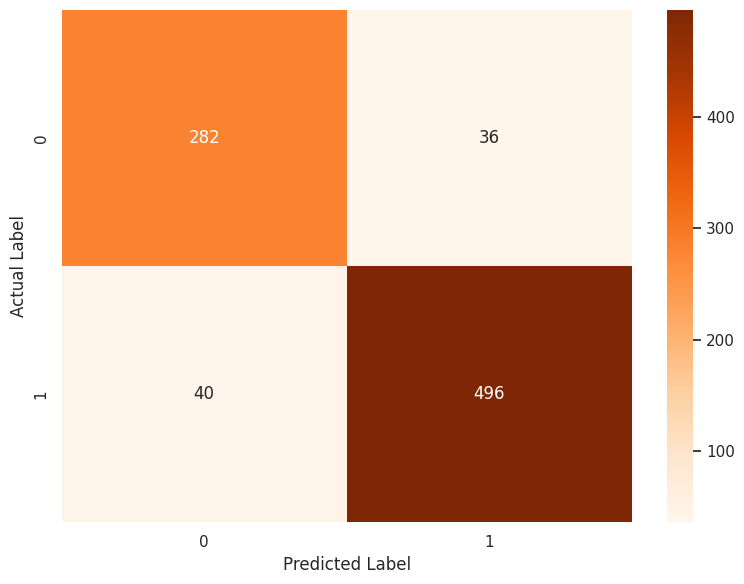

In [46]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# 11. **Model Training - Logistic Regression - Balanced Data**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Build a pipeline that ***resamples the target***, ***scales features*** and ***trains*** the Logistic Regression Model

In [48]:
pipeline2 = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline2.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

## 11.1 **Model Evaluation**

In [49]:
y_pred = pipeline2.predict(X_test)

In [50]:
acc=accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 93.09%


## 11.2 **Classification Report**

In [51]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       323
           1       0.96      0.93      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



## 11.3 **Confusion Matrix**

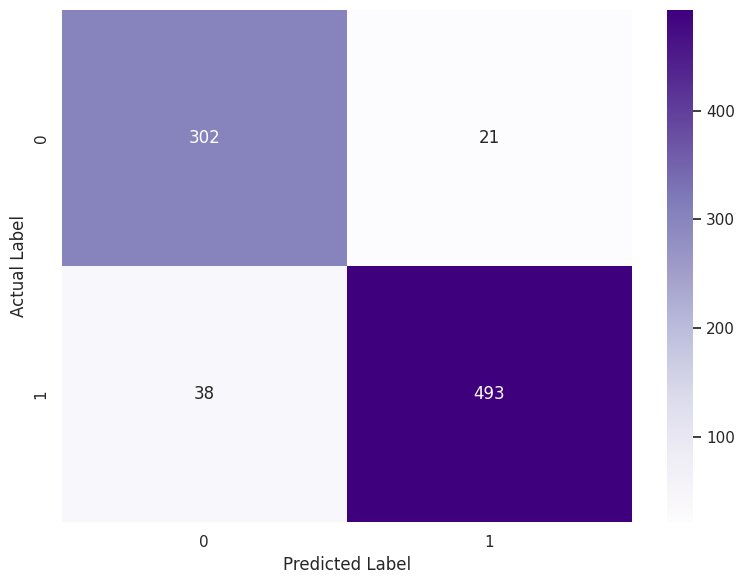

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# **DECISION TREE MODEL**

# 1- **Repeat all preprocessing/data cleaning steps**

In [53]:
df2 = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv") 

In [54]:
df2 = df2.drop(columns=["loan_id"])

In [55]:
df2.columns = [col.lstrip() for col in df2.columns]

In [56]:
df2["education"] = df2["education"].str.strip()
df2["self_employed"] = df2["self_employed"].str.strip()
df2["loan_status"] = df2["loan_status"].str.strip()

In [57]:
df2["education"] = df2["education"].replace({"Not Graduate":0, "Graduate":1})
df2["self_employed"] = df2["self_employed"].replace({"No":0, "Yes":1})
df2["loan_status"] = df2["loan_status"].replace({"Rejected":0, "Approved":1})

# 2- **Data Splitting**

In [58]:
X = df2.drop(columns=["loan_status"])
y = df2["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Since ***Decision Tree*** is robust and doesn't typically require feature scaling we will skip these 2 steps

# 3- **Model Training**

In [59]:
decisiontree = DecisionTreeClassifier(max_depth = 5, min_samples_split=20, min_samples_leaf=10,
                                      criterion="entropy", class_weight="balanced", random_state=42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

# 4- **Model Evaluation**

In [60]:
y_pred = decisiontree.predict(X_test)

In [61]:
acc=accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 97.19%


# 5- **Classification Report**

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       318
           1       0.99      0.97      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



# 6- **Confusion Matrix**

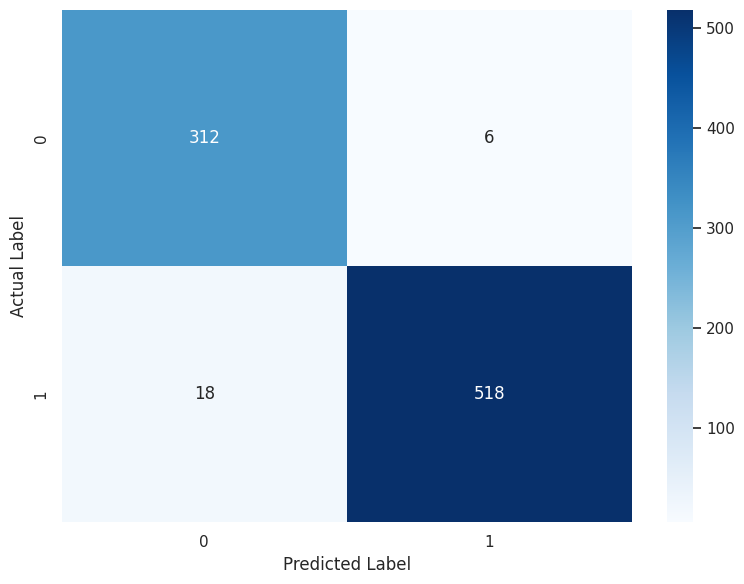

In [63]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# **Models Comparison `Precision`, `Recall`, `F1-Score`**

In [64]:
results = []

def evaluate_model(model_name, model, X_train, X_test, y_test, y_pred):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)

    results.append({
        "Model":model_name,
        "Accurcay Score %" : accuracy, 
        "Recall" : recall,
        "Precision" : precision,
        "F1 Score" : f1
    })

In [65]:
evaluate_model("Logistic Regression - Imbalanced Data", pipeline1, X_train, X_test, y_test, y_pred)
evaluate_model("Logistic Regression - Resampled Data", pipeline2, X_train, X_test, y_test, y_pred)
evaluate_model("Decision Tree", decisiontree, X_train, X_test, y_test, y_pred)
pd.DataFrame(results)

,Model,Accurcay Score %,Recall,Precision,F1 Score
0,Logistic Regression - Imbalanced Data,90.52,0.93,0.92,0.92
1,Logistic Regression - Resampled Data,91.22,0.91,0.95,0.93
2,Decision Tree,97.19,0.97,0.99,0.98


### `Precision`: Measures how many predicted approvals were actually correct.  
  - Logistic Regression (Imbalanced): **0.92**  
  - Logistic Regression (Resampled): **0.95** 
  - Decision Tree: **0.99**  

### `Recall`: Measures how many actual approvals were successfully identified.  
  - Logistic Regression (Imbalanced): **0.93**  
  - Logistic Regression (Resampled): **0.91**  
  - Decision Tree: **0.97**  

### `F1 Score`: Harmonic mean of Precision and Recall, showing their balance.  
  - Logistic Regression (Imbalanced): **0.92**  
  - Logistic Regression (Resampled): **0.93**  
  - Decision Tree: **0.98**

### **Summary:**  
- Logistic Regression provides a solid and interpretable baseline.  
- Resampling with SMOTE improves precision.  
- Decision Tree achieves the best overall.